# 데이터 증폭(이미지 데이터) 전이학습 

## (코렙이 아닌 개발도구로 하시는 것을 권장합니다.)

In [ ]:
# 공유 폴더 dataset 에서 받아주신 후에 
# flowers_init.ipynb 내부에 flowers_init() 함수에서 
# 자신이 가지고 있는 flowers 폴더가 있는 경로를 수정하여 주세요.

# def flowers_init(resolution):
#     path = '/여러분들의 경로/flowers/'

%run flowers_init.ipynb

In [ ]:
# xs는 독립변수 (이미지 데이터)
# ys는 종속변수 (원-핫 벡터 형식, 5가지 종류)
xs, ys = flowers_init([100,100])

## 데이터 증폭을 위한 라이브러리 불러오기 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ImageDataGenerator()를 이용해 이미지 추가 생성을 위한 파라미터 
#### • rotation_range : 이미지 회전값
#### • zoom_range : 이미지 일부 확대
#### • shear_range : 이미지 기울기
#### • width_shift_range : 좌우 이동
#### • height_shift_range : 상하 이동
#### • horizontal_flip : 이미지 가로 뒤집기
#### • vertical_filp : 이미지 세로 뒤집기

In [ ]:
# 데이터 증폭을 어떻게 시켜줄 것인지에 대한 값을 설정.
image_generator = ImageDataGenerator(rotation_range = 30,
                                     zoom_range = 0.7,
                                     shear_range = 0.75,
                                     width_shift_range=0.45, 
                                     height_shift_range=0.45,
                                     horizontal_flip = True, 
                                     vertical_flip = True)

## 이미지 데이터의 정규화 과정(min-max norm)
## 왜 이미지를 정규화 할 때 min-max를 사용할까요 ?

In [ ]:
xs_norm = (xs - 0) / (255.0 - 0)
print(xs_norm.min())
print(xs_norm.max())

0.0
1.0


## 데이터 셔플링 과정 

In [ ]:
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)
print(shuffle_map)

[ 645 4253 2945 ...  628 4090 1589]


## 학습 데이터 및 테스트 데이터 분할 과정 

In [ ]:
# 학습 데이터의 비율 
train_ratio = 0.8

# 학습과 테스트를 구분짓는 변수 설정
test_begin_index = int(xs_norm.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

# 독립변수의 학습 데이터 및 테스트 데이터 분할 과정 
train_x = xs_norm[shuffle_map[:test_begin_index]]
test_x  = xs_norm[shuffle_map[test_begin_index:]]

# 종속변수의 학습 데이터 및 테스트 데이터 분할 과정 
train_y = ys[shuffle_map[:test_begin_index]]
test_y  = ys[shuffle_map[test_begin_index:]]

print(train_x.shape)
print(test_x.shape)

print(train_y.shape)
print(test_y.shape)

test_begin_index :  3453
(3453, 100, 100, 3)
(864, 100, 100, 3)
(3453, 5)
(864, 5)


## 연습. 하나의 데이터를 100장으로 증폭시켜 주는 과정 

In [ ]:
augment_size = 100

In [ ]:
train_x[0].shape

(100, 100, 3)

In [ ]:
x_augment = image_generator.flow(x = np.tile(A = train_x[0].reshape(100*100*3), reps = augment_size).reshape(-1,100,100,3),
                                 # 이미 train_y가 있기 때문에 여기서 y는 구색만 맞춰주면 됩니다. 
                                 y = np.zeros(augment_size),
                                 batch_size = augment_size,
                                 # 데이터 증폭 과정에서 중복을 허용할 것이냐? 
                                 shuffle = False).next()[0]
                                 # next()[0] 코드를 작성해 주시면 증폭된 독립변수만을 가져올 수 있습니다.
                                 # next()[1] 코드를 작성해 주시면 증폭된 종속변수만을 가져올 수 있습니다. 

In [ ]:
# 정상적으로 데이터 증폭이 완료되었습니다. 
x_augment.shape

(100, 100, 100, 3)

In [ ]:
# 시각화 코드
plt.figure(figsize=(30,30))

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    i = np.random.choice(100, replace = False)
    plt.imshow(x_augment[i])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 데이터를 증폭시켜주는 과정은 위와 같이 노이즈를 주면서 증폭시켜주는 방식과 
## GAN을 사용하는 방법으로 증폭시켜줄 수 있습니다. 

## 원본 데이터(train_x) 를 증폭시켜주는 과정 

## 원본 데이터 + 증폭된 데이터

## 원본 데이터의 50%에 해당하는 복사 데이터를 생성한 후에 
## 복사 데이터를 증폭시켜 주는 과정  

In [ ]:
print(train_x.shape[0])

augment_size = int(train_x.shape[0] * 0.5)
print(augment_size)

3453
1726


## 복사본 데이터 생성 과정 

In [ ]:
x_choice = np.random.choice(train_x.shape[0], size = augment_size, replace = False)
print(x_choice[:10])

# train_x의 복사 데이터 생성 
x_augmented = train_x[x_choice].copy()
print(x_augmented.shape)

# train_y의 복사 데이터 생성 
y_augmented = train_y[x_choice].copy()
print(y_augmented.shape)

[1255  268 3062 1889 2219 2656  190 2958 2860  686]
(1726, 100, 100, 3)
(1726, 5)


In [ ]:
# 데이터(x_augmented)에 노이즈를 주며 증폭시켜주는 과정 
x_augmented = image_generator.flow(x_augmented,
                                   np.zeros(augment_size),
                                   batch_size = augment_size,
                                   shuffle = False).next()[0]

print(x_augmented.shape)

(1726, 100, 100, 3)


In [ ]:
# 시각화를 통해 결괏값 확인하는 과정 
plt.figure(figsize=(30,30))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    i = np.random.choice(1726, replace = False)
    plt.imshow(x_augmented[i])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 원본 데이터(train_x)와 증폭 데이터(x_augmented)를 결합하여 train_x를 재정의 하는 과정  
train_x = np.concatenate((train_x, x_augmented))

# 원본 데이터(train_y)와 증폭 데이터(y_augmented)를 결합하여 train_x를 재정의 하는 과정  
train_y = np.concatenate((train_y, y_augmented))

In [ ]:
print(train_x.shape)
print(train_y.shape)

(5179, 100, 100, 3)
(5179, 5)


# 전이학습 (코렙을 제외한 개발 도구 사용을 권해 드립니다.)

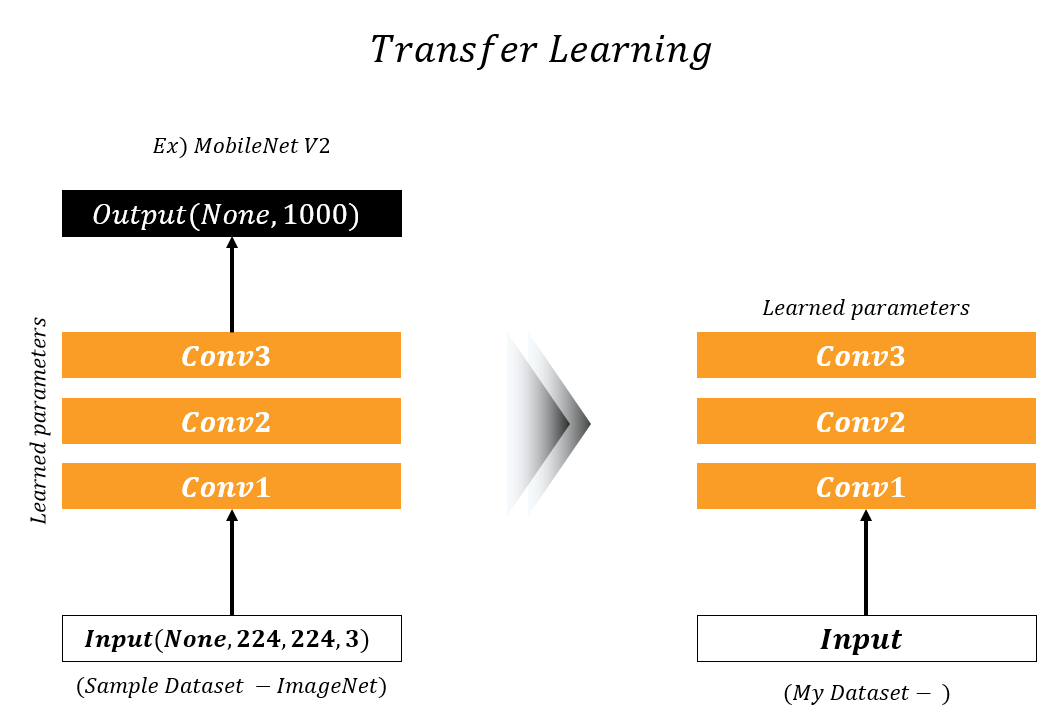

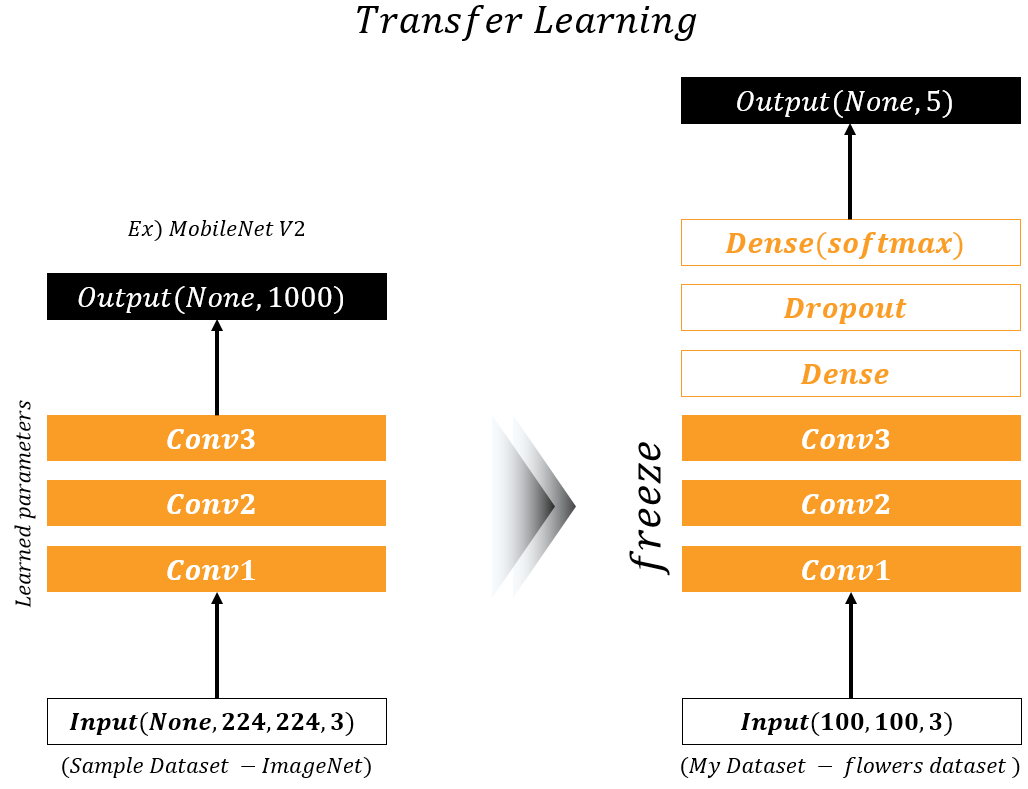

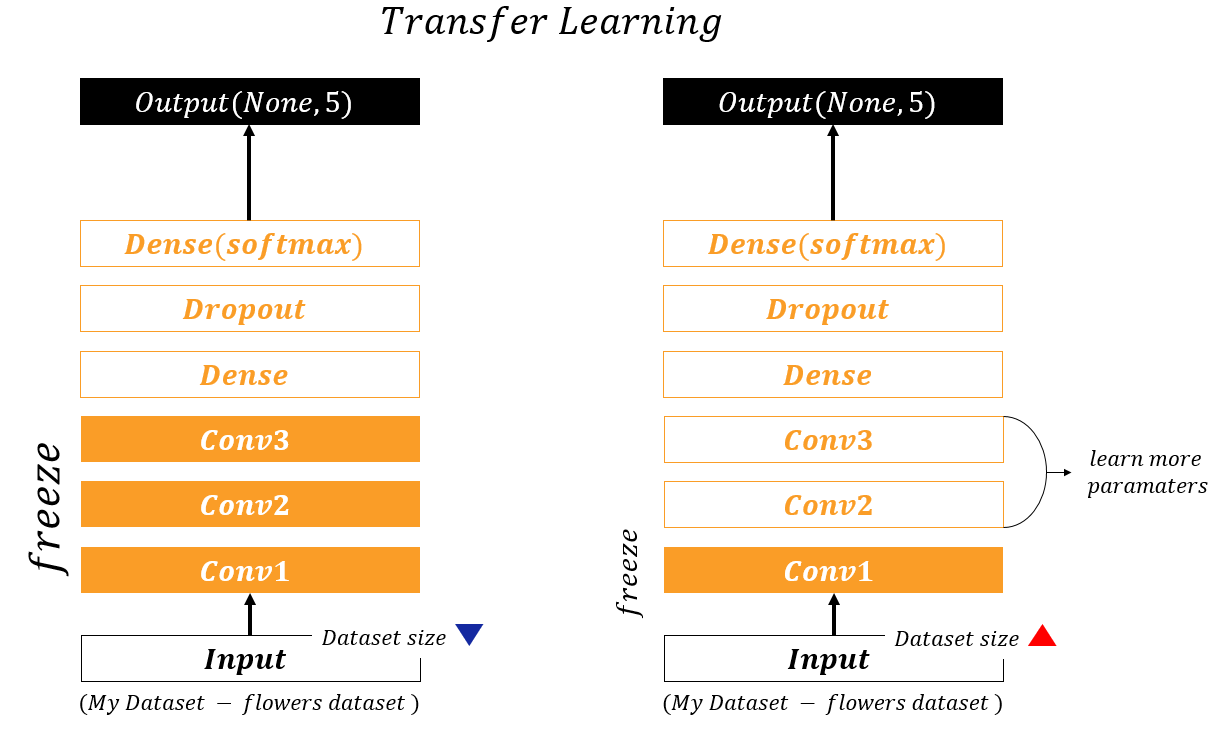

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

In [ ]:
mobile_v2 = MobileNetV2()
mobile_v2.summary()

## 데이터를 받는 방식은 2가지가 있습니다.
1. https://www.kaggle.com/c/dog-breed-identification/data

2. 코드 방식

In [ ]:
tf.keras.utils.get_file('/content/labels.csv','http://bit.ly/2GDxsYS')
tf.keras.utils.get_file('/content/train.zip','http://bit.ly/31nIyel')
tf.keras.utils.get_file('/content/test.zip','http://bit.ly/2GHEsnO')

362856448/362841195 [==============================] - 6s 0us/step


'/content/test.zip'

In [ ]:
# 코렙 전용 코드 
!unzip train.zip
!unzip test.zip

# 전이학습을 위한 라이브러리들 불러오기 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 #openCV -> pip install opencv-python / pip install cv2
import os 
import csv

from PIL import Image

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

In [ ]:
mobile_v2 = MobileNetV2()
mobile_v2.summary()

In [ ]:
vgg16 = VGG16()
vgg16.summary()

# 데이터 분석

In [ ]:
label_text = pd.read_csv('dataset/dogs/labels.csv')
print(label_text.head())
print(label_text.info())

# 견종의 수가 얼마나 되는지 확인하는 과정 

In [ ]:
label_text['breed'].nunique()

# 이미지와 견종의 대한 이름을 동시에 출력 

In [ ]:
# 사진당 크기 
plt.figure(figsize=(20,20))

# 총 16장의 사진을 출력 
for i in range(16):

    # 가로 4개 세로 4개씩 하여 이미지를 출력합니다.
    plt.subplot(4,4,i+1)

    # 무작위 값을 주어 매번 다른 이미지가 출력되도록 합니다.
    i = np.random.choice(10222)

    #label_text 변수에 loc를 사용하여 
    # [i번 째 행,'id' 라는 열] 의 값을 할당합니다.
    image_id = label_text.loc[i, 'id']

    #절대경로 설정을 활용하여 사진 출력
    # 이미지 
    plt.imshow(plt.imread('dataset/dogs/train/train/' + image_id + '.jpg'))

    #사진과 함께 번호(i) + 제목 ( loc[i,'breed'] ) 출력
    plt.title(str(i) + '-' + label_text.loc[i, 'breed'])

    # 축 정보 표기 x
    plt.axis('off')

plt.show()

# 전이학습을 위한 두 가지 실험 
# 1. 가지고온 신경망의 모든 계층을 초기화 하고 다시 학습을 시키는 과정 (학습 X - 성능이 다소 아쉽기에.)
# 2, 가지고온 신경망의 절반의 계층을 학습시킵니다. (학습 O)  

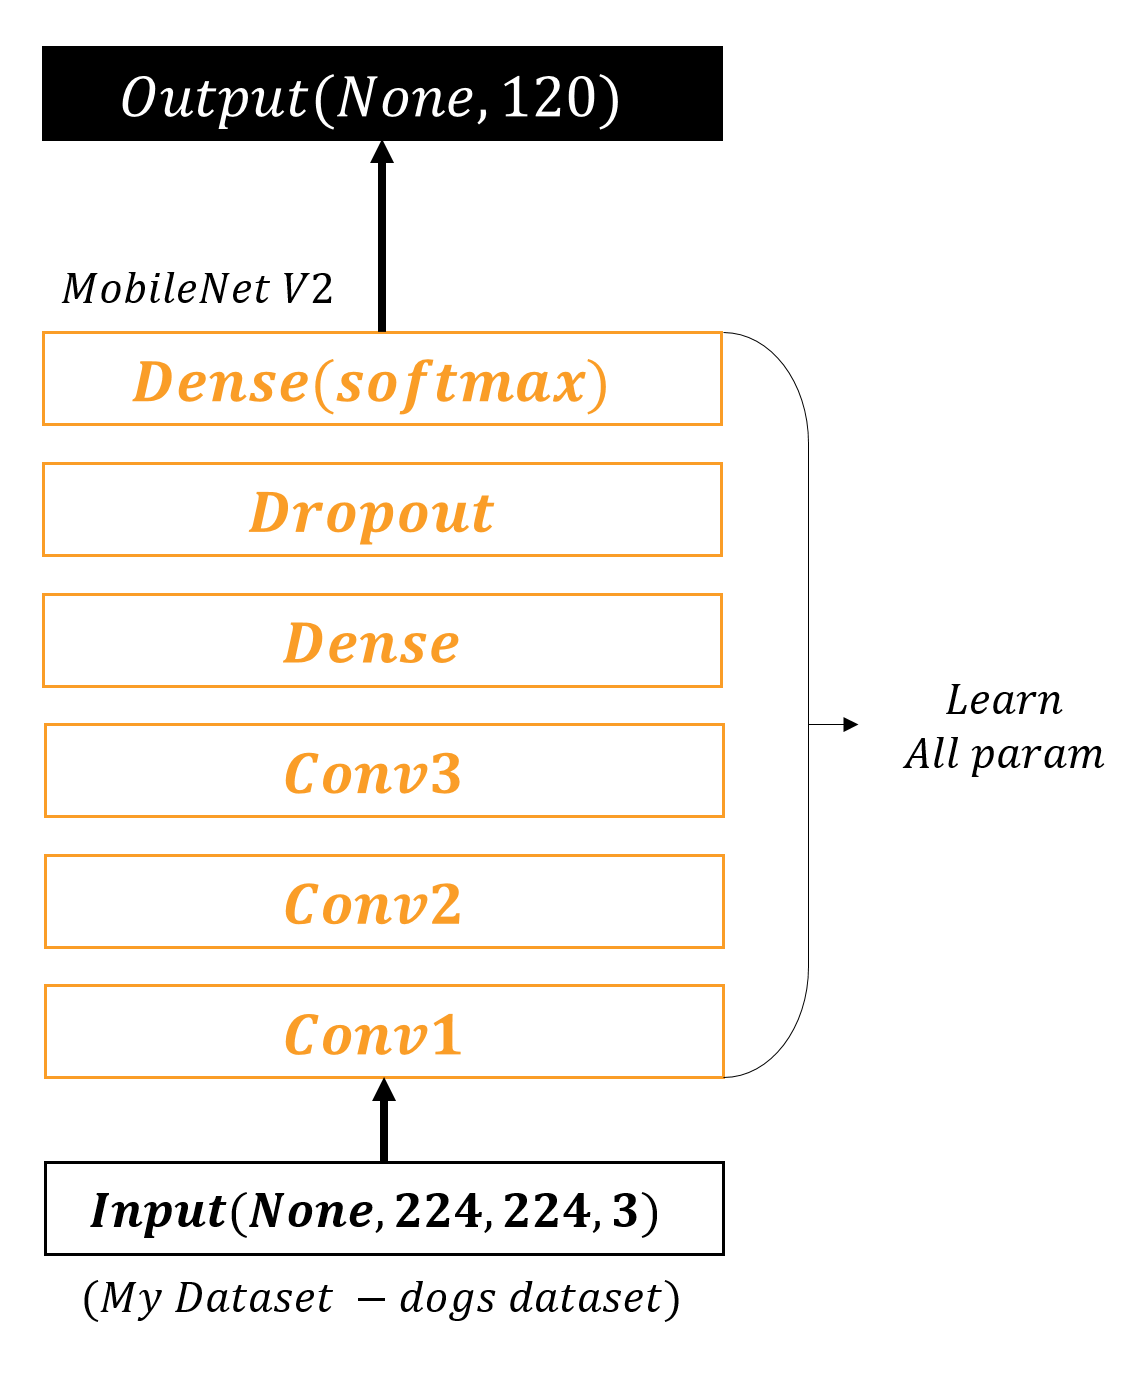

# 첫 번째 실험 

In [ ]:
mobile_v2.summary()

In [ ]:
# 대부분의 계층을 학습 가능하도록 설정해 줍니다. 
for layer in mobile_v2.layers[:-1]:
    layer.trainable = True

In [ ]:
for layer in mobile_v2.layers[:-1]:
    # 만약 레이어에 kernel(가중치)가 들어 있다면 
    if 'kernel' in layer.__dict__:

        # 기존가중치의 shape값을 획득 
        kernel_shape = np.array(layer.get_weights()).shape 
    
        # 가중치를 다시 셋팅하는 과정 (표준정규분포)
        layer.set_weights(np.random.normal(0,1, kernel_shape))

# train_x를 만드는 과정에서 에러가 뜨는 이유는 
# 쥬피터 랩이나 코렙이 전처리를 하는 과정에서 사용할 수 있는 메모리를 
# 전부 사용하였기 때문입니다. 

### 아나콘다를 다시 실행하시거나, 사용하지 않는 커널을 중지하거나 
### pc 자체를 재부팅 하시는 방법.  

In [ ]:
# 독립변수를 생성해 주는 과정 
# 1. 모든 이미지를 같은 크기로 만들어 주는 과정 
# 2. 모든 이미지를 min-max 시켜주는 과정 


train_X = [] # 전처리를 마친 변수를 받는 빈 리스트 변수 

# 모든 이미지의 수를 확인하고 반복문 활용 
for i in range(len(label_text)): 

    # 이미지 읽어들이기 (이미지 저장 경로를 확인해주세요.)
    img = cv2.imread('dataset/dogs/train/train/' + label_text['id'][i] + '.jpg')
    img = cv2.resize(img, dsize = (224,224)) #이미지 크기 통일 

    # 이미지 정규화 과정 
    img = img / 255.0 (min-max norm)

    train_X = append(img)

train_X = np.array(train_X)

print(train_X.shape)

# 종속변수를 생성하는 과정

In [ ]:
unique_Y = label_text['breed'].unique().tolist()
unique_Y.index('bluetick')

In [ ]:
train_Y = [unique_Y.index(breed) for breed in label_text['breed']]
train_Y

train_Y = np.array(train_Y)

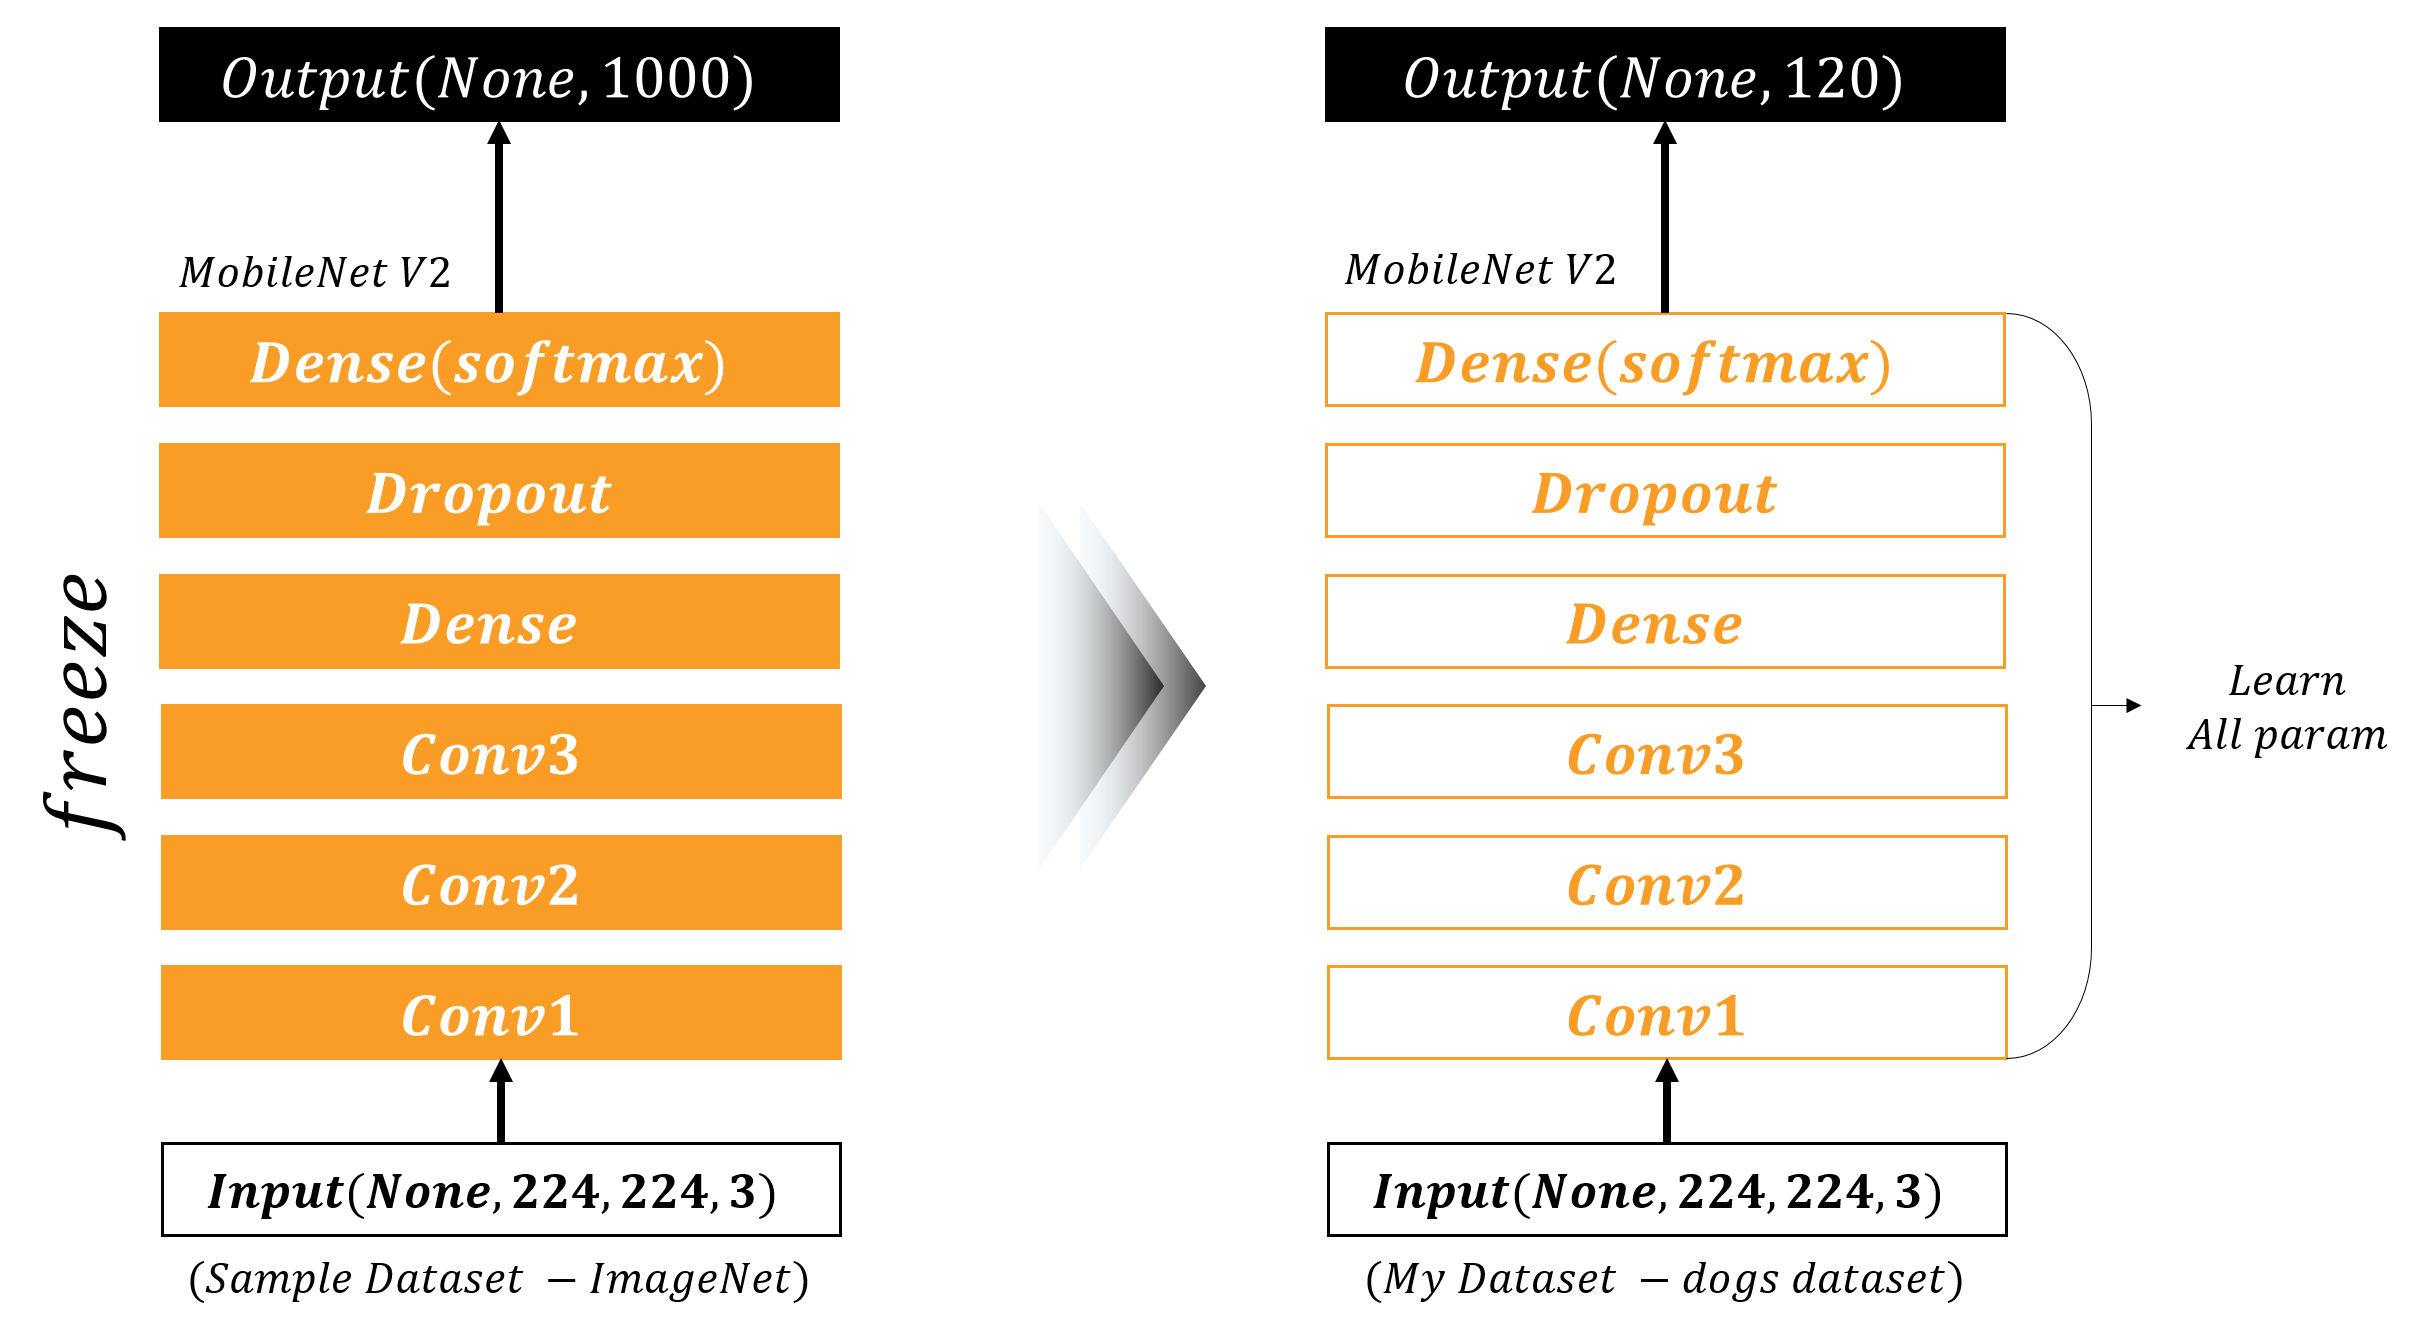

# 우리의 문제로 신경망 계층 재정의(함수형 방식)
### 함수형 방식은 현재 정의하고 있는 계층이 이전에 어떤 계층과 연결되었는지 알려줘야 합니다. 

In [ ]:
# 마지막 계층의 이전 계층
output_layer_2 = mobile_v2.layers[-2].output

# 우리의 문제에 맞는 출력 계층
predictions = tf.keras.layers.Dense(units = 120, activation='softmax')(output_layer_2)

# 입력 계층은 모바일넷의 입력계층을 사용.
# 출력 계층은 우리가 만들어준 변수를 사용.
model = tf.keras.Model(inputs = mobile_v2.input , outputs = predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

# 컴파일 과정 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 텐서보드를 위한 log 폴더 생성 과정 

In [ ]:
os.makedirs('/content/log/')

In [ ]:
log_dir = '/content/log/'

# 학습을 위한 코드
## 이 코드는 실행시키 마세요! (성능이 다소 아쉽니다.학습도 오래걸려요...)

In [ ]:
history = model.fit(train_X, train_Y, 
                    epochs = 10, 
                    validation_split = 0.25,
                    batch_size = 32,
                                # 조기 중단 
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),
                                # 텐서 보드  
                                 tf.keras.callbacks.TensorBoard(log_dir=log_dir)])

# 두 번째 실험 
# 절반의 계층만 학습을 시켜주는 방식입니다. 

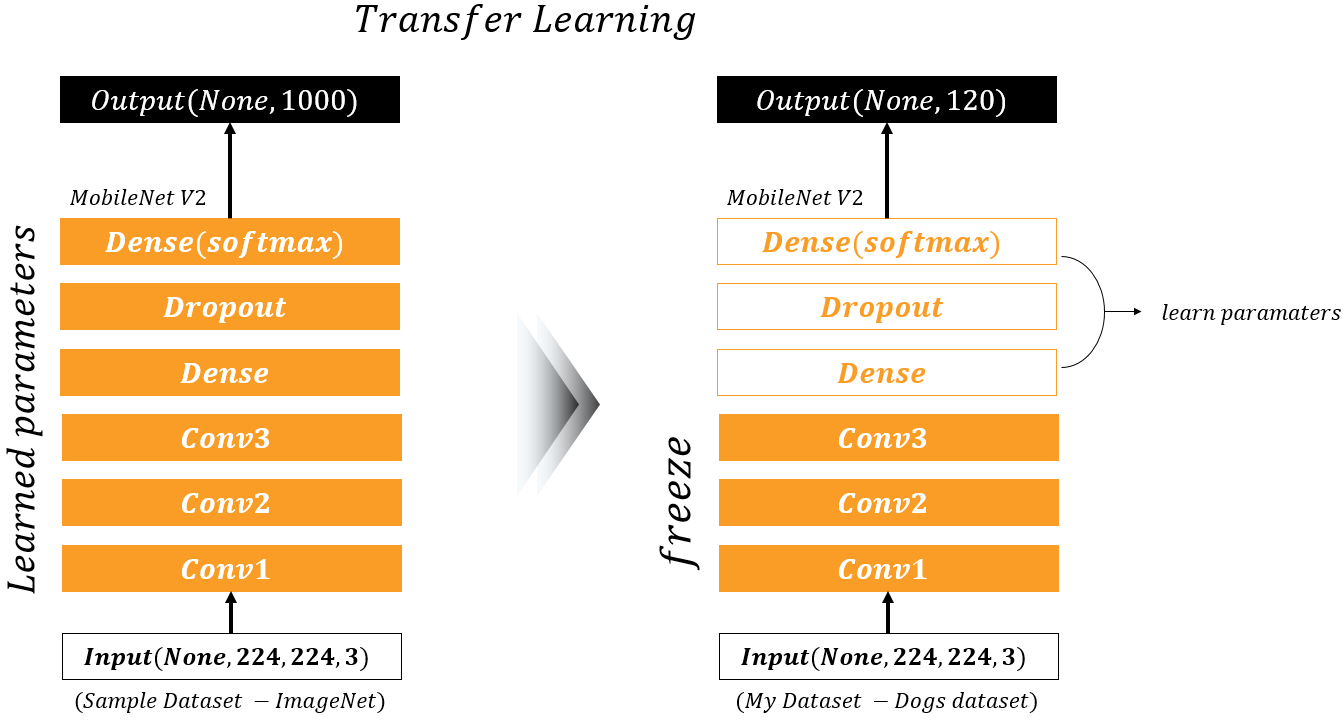

In [ ]:
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf

mobilev2        = MobileNetV2()
output_layer_2  = mobilev2.layers[-2].output
predictions     = tf.keras.layers.Dense(120, activation='softmax')(output_layer_2)

model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)
model.summary()

In [ ]:
# 신경망 계층의 절반만 학습을 시켜주기 위한 코드 

for layer in model.layers[:-20]:
    layer.trainable = False

for layer in model.layers[-20:]:
    layer.trainable = True

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_Y, 
                    epochs = 10, 
                    validation_split = 0.25,
                    batch_size = 32,
                                # 조기 중단 
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),
                                # 텐서 보드  
                                 tf.keras.callbacks.TensorBoard(log_dir=log_dir)])

# 텐서보드 사용 방법 

## 1. 아나콘다 프롬프트에 접근합니다. 
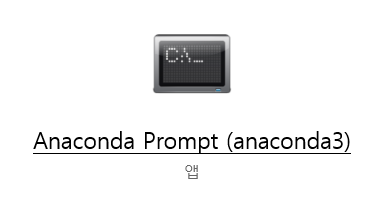

# 2. 현재 사용중인 가상환경으로 이동합니다. 

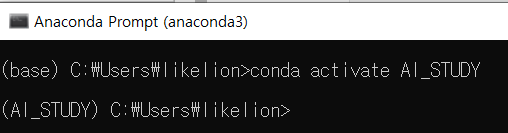

#### conda activate [가상환경이름]

# 3. 가상환경에서 텐서보드를 실행시키기 위한 코드 작성 
### tensorboard --logdir=C:\Users\likelion\AI_STUDY\dataset\dogs\log
### 여기서 log 파일까지의 경로는 여러분들의 경로로 잡아주시면 됩니다. 

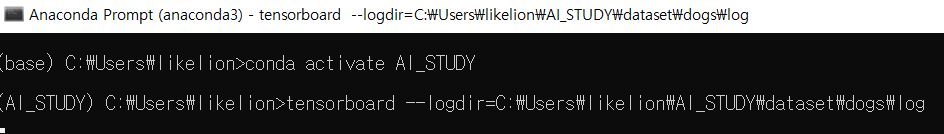

# 4. 하단에 출력되어진 localhost 주소를 복사하여 웹에 붙여넣어 줍니다. 
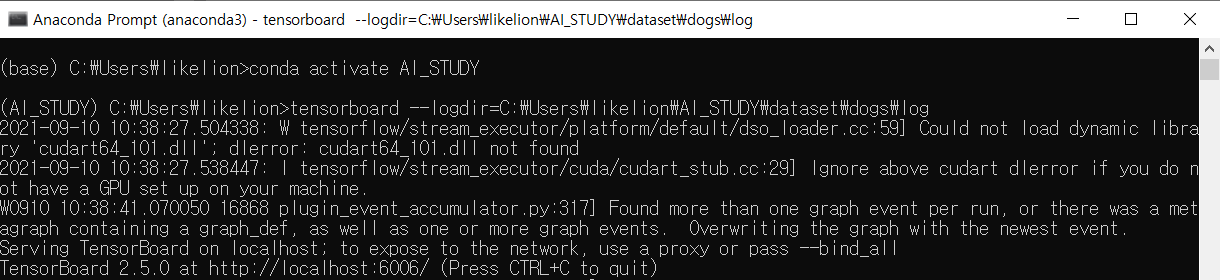 

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')

plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('save_model/ImageNet_dogs.h5')

In [ ]:
img = plt.imread('dataset/dogs/test/test/001510bc8570bbeee98c8d80c8a95ec1.jpg')
img = np.resize(img,(224,224,3))
img = img / 255.0
img = np.expand_dims(img, axis=0)

prob = model.predict(img)

In [ ]:
print("Predict Prob : \n",np.round(prob * 100,1))
plt.imshow(plt.imread('dataset/dogs/test/test/001510bc8570bbeee98c8d80c8a95ec1.jpg'))
print("Model Predict : Index-{}".format(np.argmax(prob)))

# 함수형 방식으로 구축하는 신경망 
* 자연어처리를 위한 CNN 신경망

# 은닉계층을 포함한 NUMPY로 구축하는 신경망 
* 공유폴더 -> dataset -> DNN_CODE -> ipynb 파일 확인 

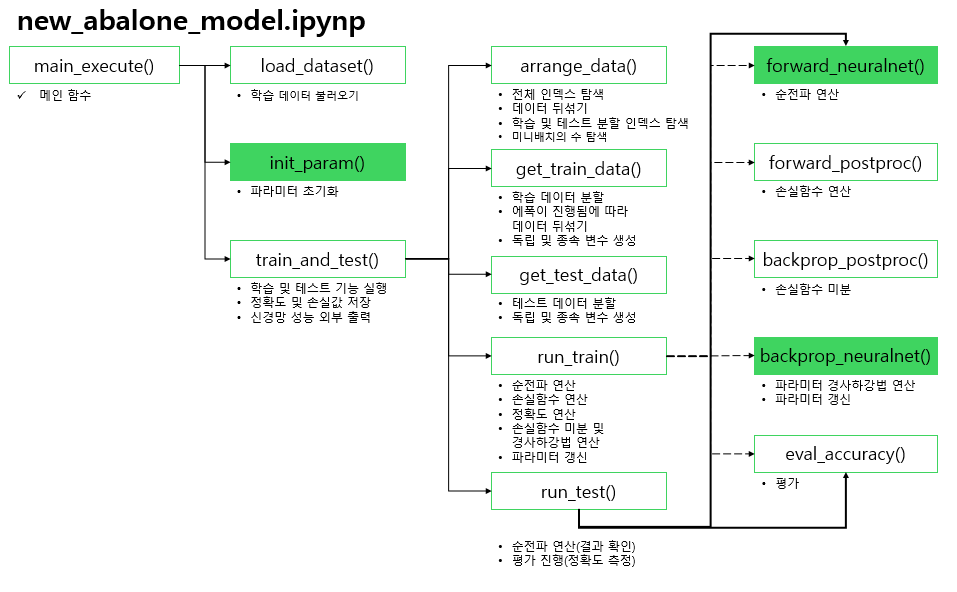

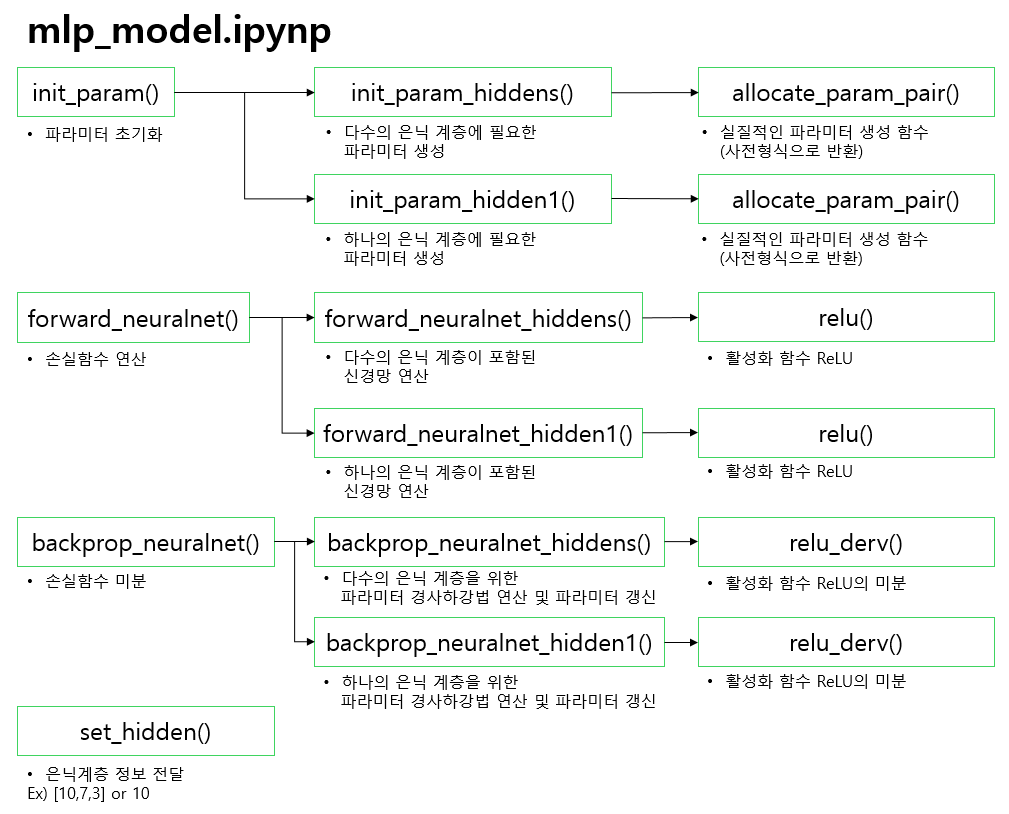

In [1]:
# 은닉계층이 없는경우에 회귀모델 신경망 구축 
%run MathUtils.ipynb
%run new_abalone_model.ipynb

In [7]:
main_execute(epoch_count=200, mb_size=16, report = 20, train_ratio=0.8)

Epoch 20 : Train - Loss = 5.935, Accuracy = 0.823 / Test - Accuracy = 0.809
Epoch 40 : Train - Loss = 5.454, Accuracy = 0.830 / Test - Accuracy = 0.824
Epoch 60 : Train - Loss = 5.190, Accuracy = 0.835 / Test - Accuracy = 0.830
Epoch 80 : Train - Loss = 5.033, Accuracy = 0.837 / Test - Accuracy = 0.826
Epoch 100 : Train - Loss = 4.958, Accuracy = 0.839 / Test - Accuracy = 0.829
Epoch 120 : Train - Loss = 4.911, Accuracy = 0.840 / Test - Accuracy = 0.834
Epoch 140 : Train - Loss = 4.880, Accuracy = 0.840 / Test - Accuracy = 0.834
Epoch 160 : Train - Loss = 4.864, Accuracy = 0.840 / Test - Accuracy = 0.834
Epoch 180 : Train - Loss = 4.854, Accuracy = 0.840 / Test - Accuracy = 0.834
Epoch 200 : Train - Loss = 4.836, Accuracy = 0.840 / Test - Accuracy = 0.837
==============================  Final TEST  ==============================

Final Accuracy = 83.736 % 


In [8]:
# 하나의 은닉계층이 있는경우에 회귀모델 신경망 구축 
%run MathUtils.ipynb
%run new_abalone_model.ipynb
%run mlp_model.ipynb

In [9]:
# set_hidden() 함수는 은닉계층의 값을 설정하는 함수 입니다. 
# 하나의 은닉 계층에 10개의 노드를 배치하고 싶다면 set_hidden(10) 과 같이 정의해주세요. 
set_hidden(10)

In [10]:
main_execute(epoch_count=200, mb_size=16, report = 20, train_ratio=0.8)

은닉 계층 하나를 갖는 신경망이 작동되었습니다.
Epoch 20 : Train - Loss = 4.929, Accuracy = 0.840 / Test - Accuracy = 0.855
Epoch 40 : Train - Loss = 4.752, Accuracy = 0.843 / Test - Accuracy = 0.855
Epoch 60 : Train - Loss = 4.710, Accuracy = 0.844 / Test - Accuracy = 0.860
Epoch 80 : Train - Loss = 4.632, Accuracy = 0.845 / Test - Accuracy = 0.819
Epoch 100 : Train - Loss = 4.633, Accuracy = 0.846 / Test - Accuracy = 0.845
Epoch 120 : Train - Loss = 4.581, Accuracy = 0.847 / Test - Accuracy = 0.835
Epoch 140 : Train - Loss = 4.657, Accuracy = 0.846 / Test - Accuracy = 0.856
Epoch 160 : Train - Loss = 4.605, Accuracy = 0.846 / Test - Accuracy = 0.858
Epoch 180 : Train - Loss = 4.587, Accuracy = 0.847 / Test - Accuracy = 0.854
Epoch 200 : Train - Loss = 4.567, Accuracy = 0.847 / Test - Accuracy = 0.861
==============================  Final TEST  ==============================

Final Accuracy = 86.115 % 


In [15]:
# set_hidden() 함수는 은닉계층의 값을 설정하는 함수 입니다. 
# 다수의 은닉 계층을 배치하고 싶다면 
# Ex) 
# 첫 번째 은닉 계층의 노드는 10개  
# 두 번째 은닉 계층의 노드는 7개  
# 세 번째 은닉 계층의 노드는 5개  

set_hidden(info = [10, 7, 5])

In [16]:
main_execute(epoch_count=200, mb_size=16, report = 20, train_ratio=0.8)

은닉 계층 3개를 갖는 다층 신경망 작동했습니다.
Epoch 20 : Train - Loss = 5.071, Accuracy = 0.839 / Test - Accuracy = 0.854
Epoch 40 : Train - Loss = 4.857, Accuracy = 0.842 / Test - Accuracy = 0.863
Epoch 60 : Train - Loss = 4.722, Accuracy = 0.844 / Test - Accuracy = 0.797
Epoch 80 : Train - Loss = 4.680, Accuracy = 0.844 / Test - Accuracy = 0.864
Epoch 100 : Train - Loss = 4.656, Accuracy = 0.846 / Test - Accuracy = 0.843
Epoch 120 : Train - Loss = 4.735, Accuracy = 0.845 / Test - Accuracy = 0.850
Epoch 140 : Train - Loss = 4.627, Accuracy = 0.846 / Test - Accuracy = 0.865
Epoch 160 : Train - Loss = 4.611, Accuracy = 0.847 / Test - Accuracy = 0.863
Epoch 180 : Train - Loss = 4.610, Accuracy = 0.847 / Test - Accuracy = 0.865
Epoch 200 : Train - Loss = 4.619, Accuracy = 0.847 / Test - Accuracy = 0.854
==============================  Final TEST  ==============================

Final Accuracy = 85.407 % 


# 함수형 방식으로 구축하는 신경망
* 자연어처리를 위한 CNN 신경망

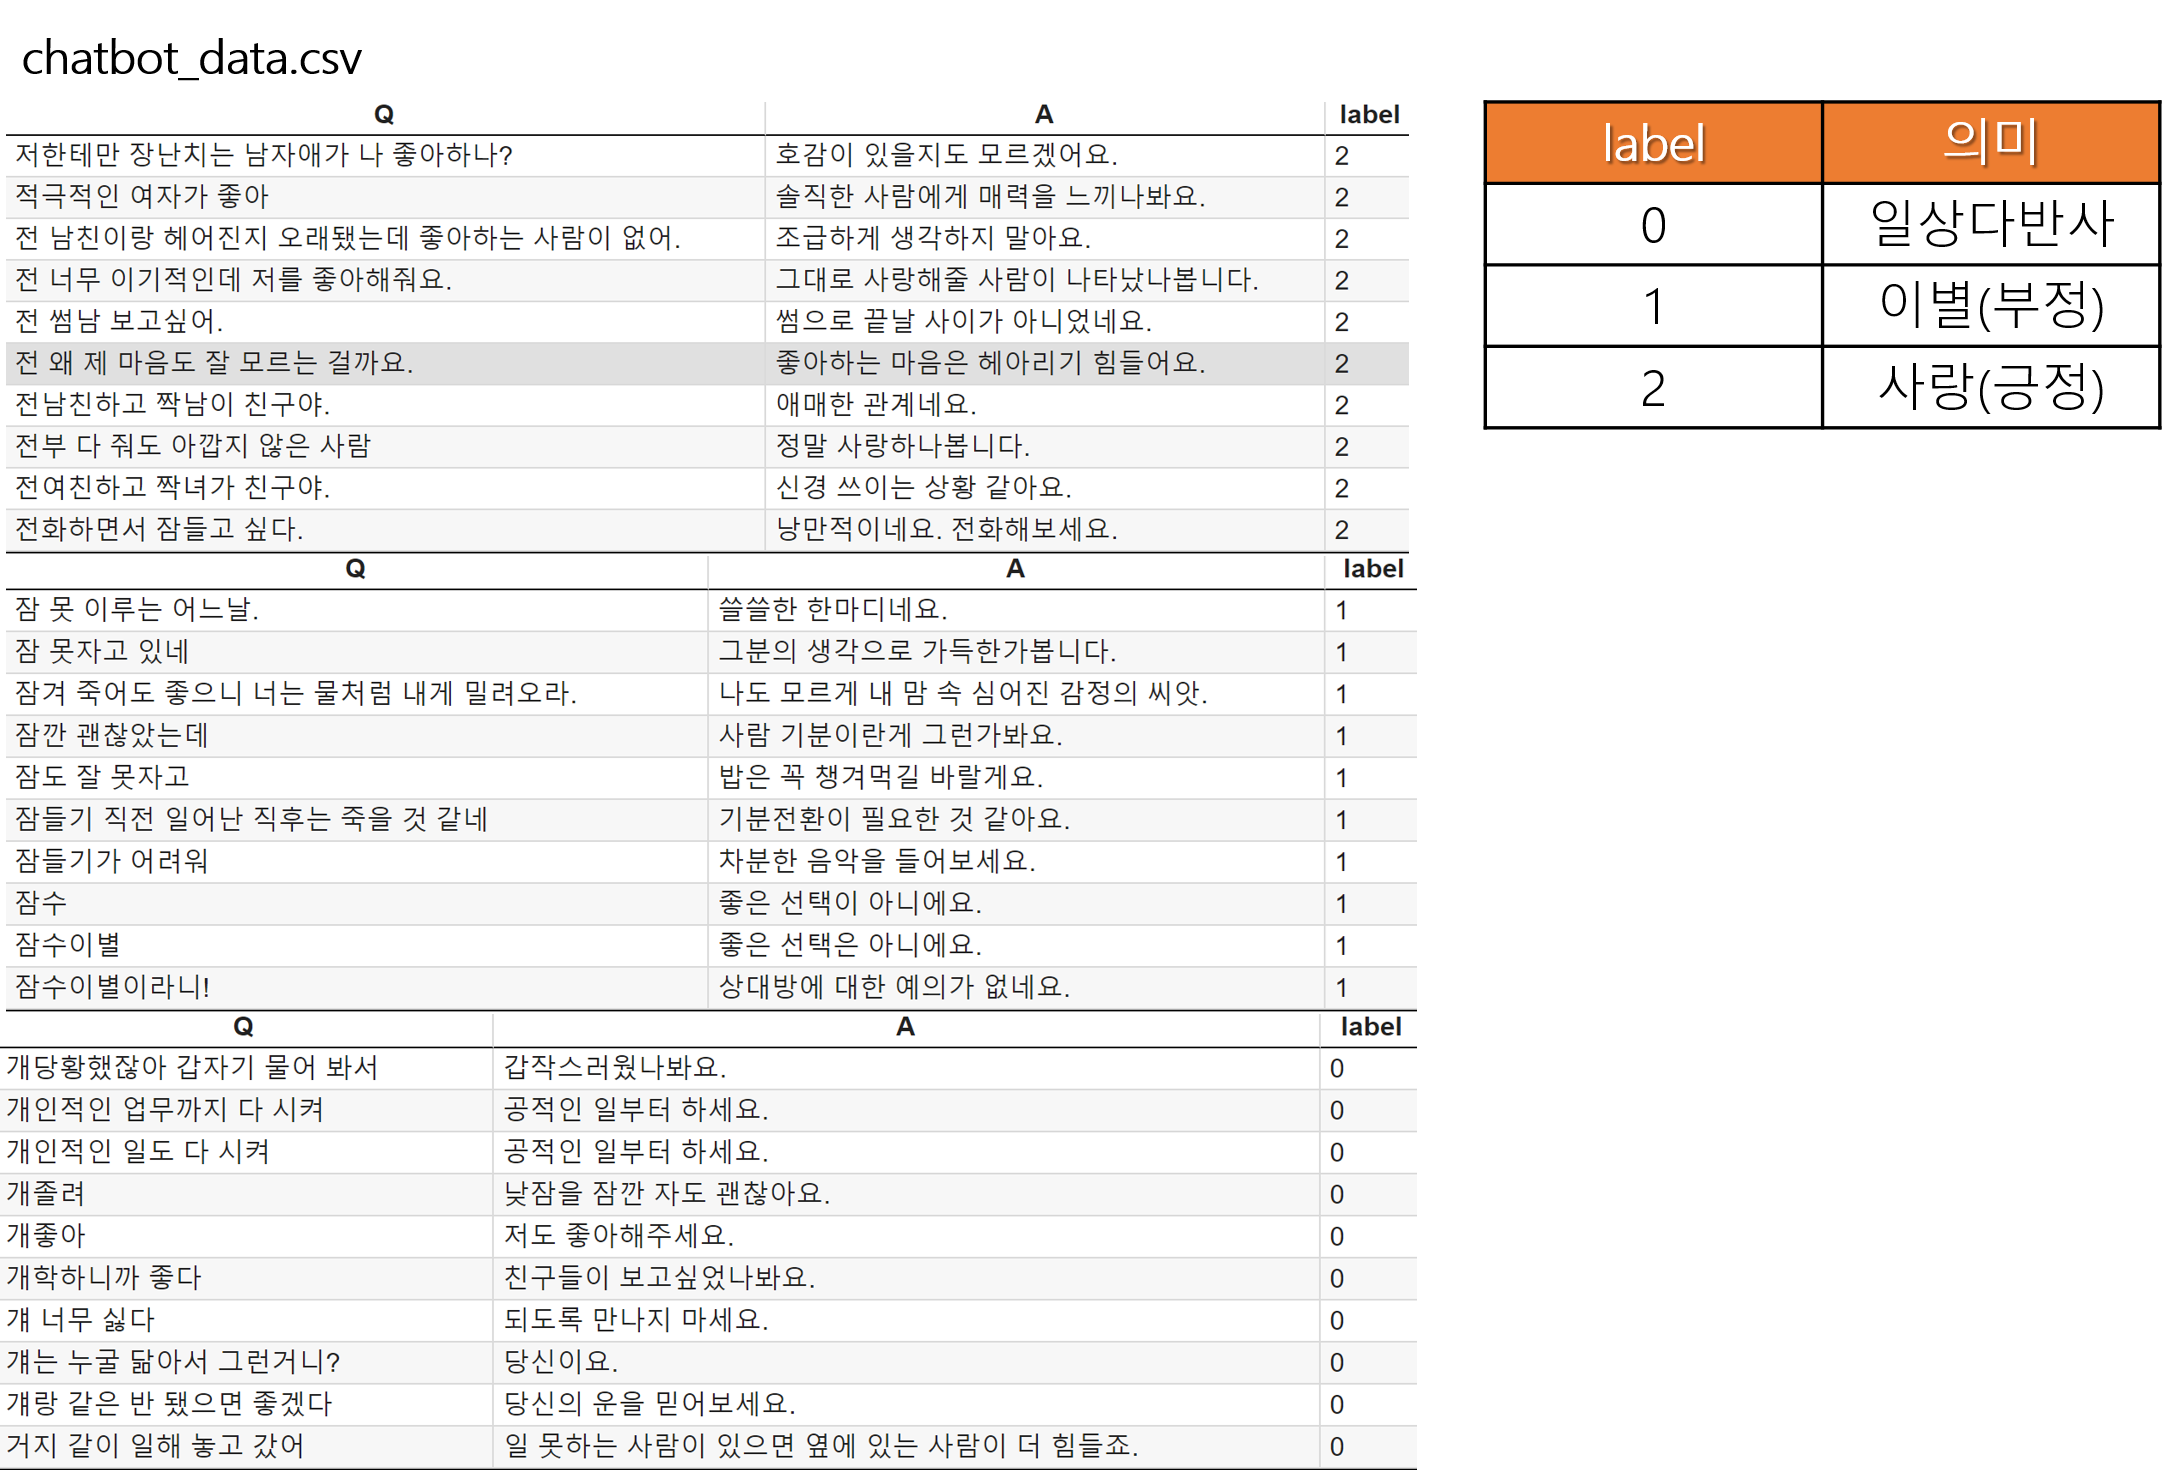

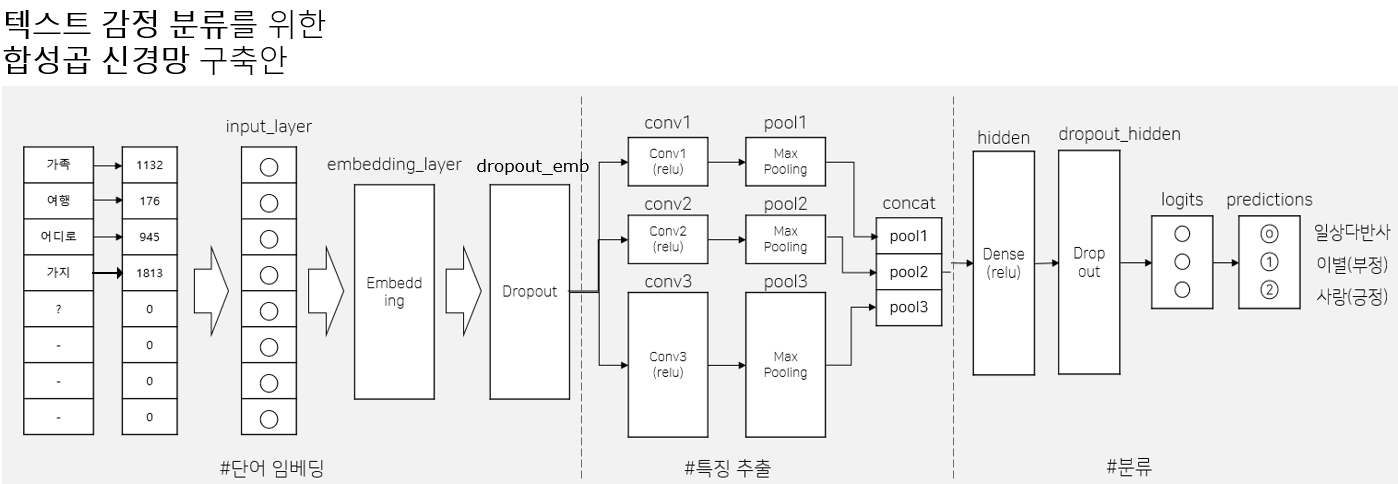

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 전처리를 위한 라이브러리 
from tensorflow.keras import preprocessing

# 함수형 방식으로 신경망 구축을 위한 라이브러리 
# 변수명 = 레이어 함수()
from tensorflow.keras.layers import Input, Embedding, Dropout, Conv1D, GlobalMaxPooling1D, concatenate, Dense

# 각 레이어 변수들을 하나로 모아 신경망으로 만들어 주는 라이브러리 
from tensorflow.keras.models import Model


In [18]:
# 데이터 분석 
data = pd.read_csv('/content/chatbot_data.csv', delimiter = ',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


In [19]:
# 독립변수(질문-'Q')
features = data['Q'].tolist()

# 종속변수(라벨-'label')
labels   = data['label'].tolist()

In [21]:
print(features[:10])
print(labels[:10])

['12시 땡!', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네', 'SD카드 망가졌어', 'SD카드 안돼', 'SNS 맞팔 왜 안하지ㅠㅠ', 'SNS 시간낭비인 거 아는데 매일 하는 중', 'SNS 시간낭비인데 자꾸 보게됨']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
# 전체 데이터(문장)를 각각의 문장으로 분류하고,
# 각각의 문장을 단어별로 나눠주는 과정이 필요. 

corpus_row = []

for text in features:

    # 문장을 단어별로 끊어서 corpus 변수에 저장하는 과정 
    corpus = preprocessing.text.text_to_word_sequence(text)

    corpus_row.append(corpus)

print("corpus_row :\n" , corpus_row)

corpus_row :
 [['12시', '땡'], ['1지망', '학교', '떨어졌어'], ['3박4일', '놀러가고', '싶다'], ['3박4일', '정도', '놀러가고', '싶다'], ['ppl', '심하네'], ['sd카드', '망가졌어'], ['sd카드', '안돼'], ['sns', '맞팔', '왜', '안하지ㅠㅠ'], ['sns', '시간낭비인', '거', '아는데', '매일', '하는', '중'], ['sns', '시간낭비인데', '자꾸', '보게됨'], ['sns보면', '나만', '빼고', '다', '행복해보여'], ['가끔', '궁금해'], ['가끔', '뭐하는지', '궁금해'], ['가끔은', '혼자인게', '좋다'], ['가난한', '자의', '설움'], ['가만', '있어도', '땀난다'], ['가상화폐', '쫄딱', '망함'], ['가스불', '켜고', '나갔어'], ['가스불', '켜놓고', '나온거', '같아'], ['가스비', '너무', '많이', '나왔다'], ['가스비', '비싼데', '감기', '걸리겠어'], ['가스비', '장난', '아님'], ['가장', '확실한', '건', '뭘까'], ['가족', '여행', '가기로', '했어'], ['가족', '여행', '고고'], ['가족', '여행', '어디로', '가지'], ['가족', '있어'], ['가족관계', '알려', '줘'], ['가족끼리', '여행간다'], ['가족들', '보고', '싶어'], ['가족들이랑', '서먹해'], ['가족들이랑', '서먹해졌어'], ['가족들이랑', '어디', '가지'], ['가족들이랑', '여행', '갈거야'], ['가족여행', '가야지'], ['가족이', '누구야'], ['가족이랑', '여행', '가려고'], ['가족한테', '스트레스', '풀었어'], ['가출할까'], ['가출해도', '갈', '데가', '없어'], ['간만에', '떨리니까', '좋더라'], ['간만에', '쇼핑', '중'], ['간만에', '휴식', '중'], ['

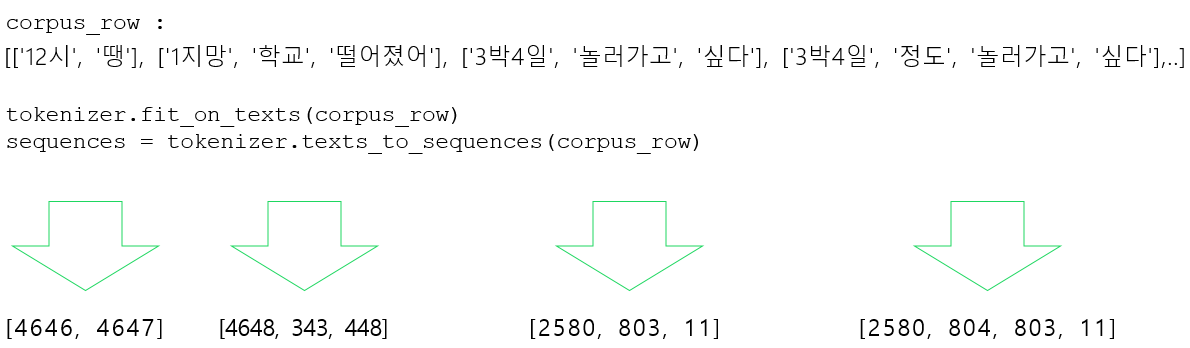

In [24]:
# tokenizer 
# 텍스트를 단어 기반으로 토큰화 시켜주는 인스턴스 변수 생성 
tokenizer= preprocessing.text.Tokenizer()

# 토큰을 시퀀스 번호로 변환시켜주는 과정 
tokenizer.fit_on_texts(corpus_row)

# 시퀀스 번호를 바탕으로 단어를 임베딩 벡터화 시키는 과정
sequences = tokenizer.texts_to_sequences(corpus_row)

print("sequences : \n", sequences)

sequences : 
 [[4646, 4647], [4648, 343, 448], [2580, 803, 11], [2580, 804, 803, 11], [4649, 2581], [2582, 4650], [2582, 64], [805, 4651, 14, 4652], [805, 4653, 3, 502, 238, 45, 106], [805, 4654, 23, 4655], [4656, 52, 1128, 28, 1373], [693, 266], [693, 2583, 266], [2584, 4657, 324], [4658, 4659, 4660], [4661, 1129, 2585], [4662, 4663, 1374], [2586, 4664, 1375], [2586, 4665, 2587, 5], [1811, 1, 27, 4666], [1811, 2588, 1130, 4667], [1811, 628, 1131], [944, 1812, 154, 128], [1132, 176, 1376, 184], [1132, 176, 1133], [1132, 176, 945, 1813], [1132, 25], [2589, 4668, 503], [2590, 4669], [4670, 94, 4], [1377, 4671], [1377, 4672], [1377, 368, 1813], [1377, 176, 4673], [4674, 280], [2591, 1378], [4675, 176, 1379], [2592, 253, 4676], [4677], [4678, 504, 1380, 20], [1381, 4679, 1814], [1381, 1134, 106], [1381, 2593, 106], [1815, 41, 405], [1815, 254], [4680, 2594], [4681, 75], [325, 505, 308, 67], [325, 505], [2595, 2596, 53, 11], [2595, 2596, 185], [1130, 109], [1130, 1382, 18, 5], [1130, 2597, 

In [26]:
word_index = tokenizer.word_index
print(word_index)
print(len(word_index))

{'너무': 1, '좋아하는': 2, '거': 3, '싶어': 4, '같아': 5, '안': 6, '나': 7, '좀': 8, '사람': 9, '내가': 10, '싶다': 11, '어떻게': 12, '썸': 13, '왜': 14, '내': 15, '사람이': 16, '이별': 17, '것': 18, '잘': 19, '없어': 20, '수': 21, '오늘': 22, '자꾸': 23, '이제': 24, '있어': 25, '또': 26, '많이': 27, '다': 28, '있을까': 29, '헤어진지': 30, '해': 31, '다시': 32, '될까': 33, '여자친구가': 34, '남자친구가': 35, '더': 36, '진짜': 37, '정말': 38, '게': 39, '나를': 40, '뭐': 41, '좋아': 42, '할까': 43, '하고': 44, '하는': 45, '연애': 46, '있는': 47, '계속': 48, '힘드네': 49, '연락': 50, '이': 51, '나만': 52, '먹고': 53, '이렇게': 54, '있는데': 55, '못': 56, '날': 57, '혼자': 58, '다른': 59, '방법': 60, '타는': 61, '한': 62, '그': 63, '안돼': 64, '그냥': 65, '없는': 66, '돼': 67, '짝남이': 68, '좋겠다': 69, '선물': 70, '모르겠어': 71, '같이': 72, '나한테': 73, '같은데': 74, '싫어': 75, '친구가': 76, '마음이': 77, '짝사랑': 78, '가고': 79, '사랑': 80, '헤어진': 81, '많아': 82, '힘들어': 83, '연락이': 84, '줄': 85, '좋겠어': 86, '술': 87, '후': 88, '짝남': 89, '듯': 90, '좋은': 91, '좋을까': 92, '나는': 93, '보고': 94, '해도': 95, '할': 96, '사랑이': 97, '짝녀가': 98, '말': 99, '남자': 100, '참'

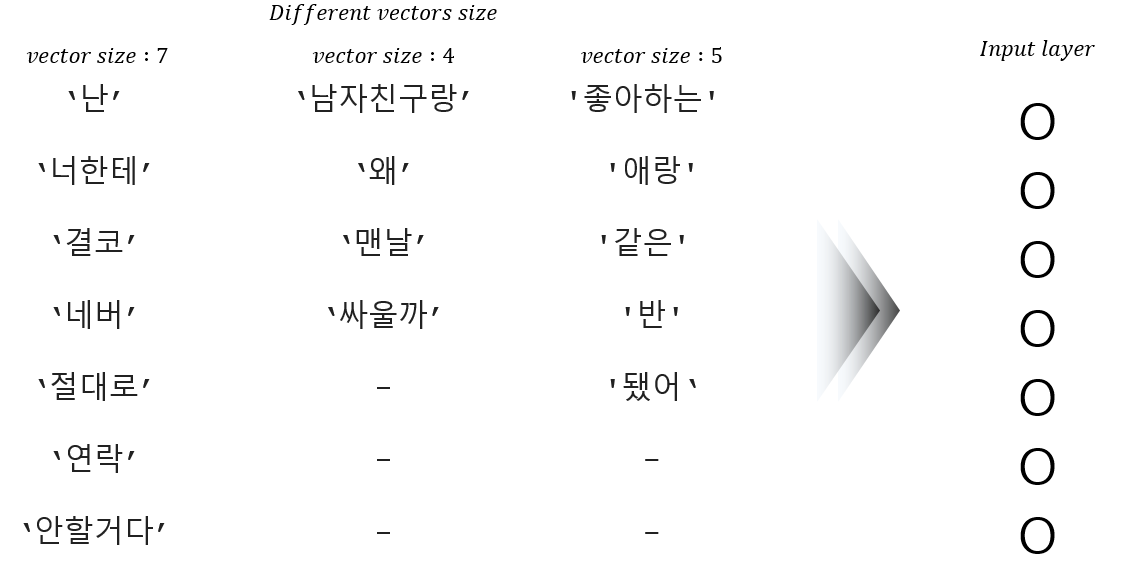

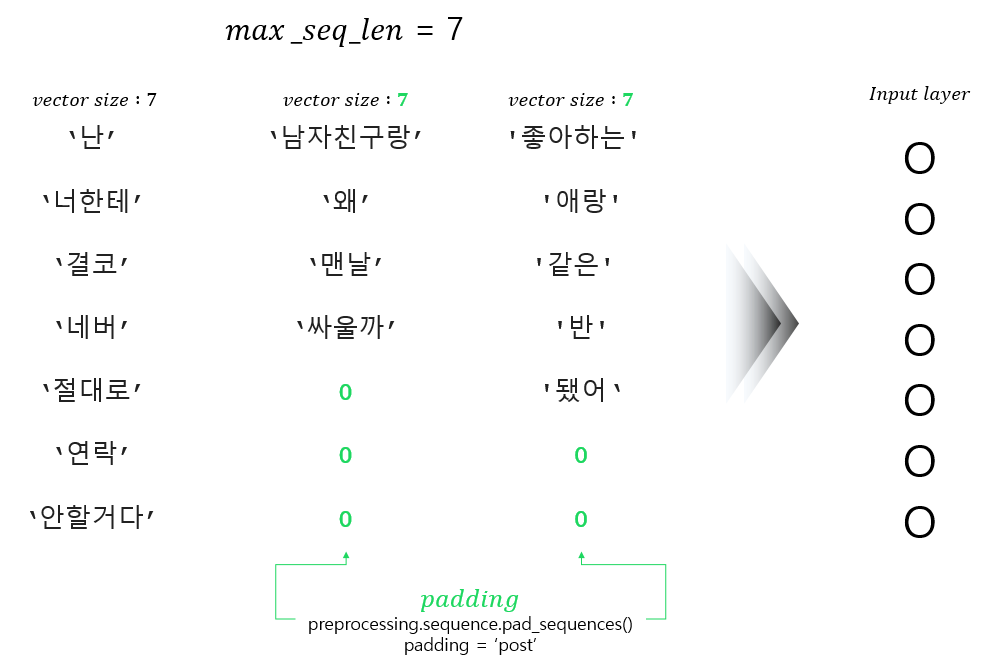

In [27]:
pd.DataFrame(sequences)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4646,4647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4648,343.0,448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2580,803.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2580,804.0,803.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4649,2581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11818,4645,204.0,940.0,2511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11819,4645,204.0,940.0,2511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11820,13395,2517.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11821,147,46.0,91.0,13396.0,112.0,13397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
padded_seqs= preprocessing.sequence.pad_sequences(sequences, padding = 'post')
pd.DataFrame(padded_seqs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4646,4647,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4648,343,448,0,0,0,0,0,0,0,0,0,0,0,0
2,2580,803,11,0,0,0,0,0,0,0,0,0,0,0,0
3,2580,804,803,11,0,0,0,0,0,0,0,0,0,0,0
4,4649,2581,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11818,4645,204,940,2511,0,0,0,0,0,0,0,0,0,0,0
11819,4645,204,940,2511,0,0,0,0,0,0,0,0,0,0,0
11820,13395,2517,89,0,0,0,0,0,0,0,0,0,0,0,0
11821,147,46,91,13396,112,13397,0,0,0,0,0,0,0,0,0


# 1. 독립변수를 학습 데이터와 테스트 데이터로 나눠주는 과정

In [30]:
shuffle_map = np.arange(len(padded_seqs), dtype='int')
print("shuffle_map : ", shuffle_map)

np.random.shuffle(shuffle_map)

print("shuffle_map : ", shuffle_map)

train_ratio = 0.7 

test_begin_index = int(padded_seqs.shape[0] * train_ratio)
print("test_begin_index : ",test_begin_index)

train_x = padded_seqs[shuffle_map][:test_begin_index, :]
test_x = padded_seqs[shuffle_map][test_begin_index:, :]
print(train_x.shape)
print(test_x.shape)

shuffle_map :  [    0     1     2 ... 11820 11821 11822]
shuffle_map :  [ 7152 11434  3486 ...  4405  7559  3834]
test_begin_index :  8276
(8276, 15)
(3547, 15)


# 2. 종속변수를 학습 데이터와 테스트 데이터로 나눠주는 과정

In [31]:
shuffle_map_list = shuffle_map.tolist()

label_y_row = []
for i in shuffle_map:
    label_y = labels[i]
    label_y_row.append(label_y)

label_y_row = np.asarray(label_y_row)   

train_y = label_y_row[:test_begin_index]
test_y = label_y_row[test_begin_index:]

print(train_y.shape)
print(test_y.shape)

(8276,)
(3547,)


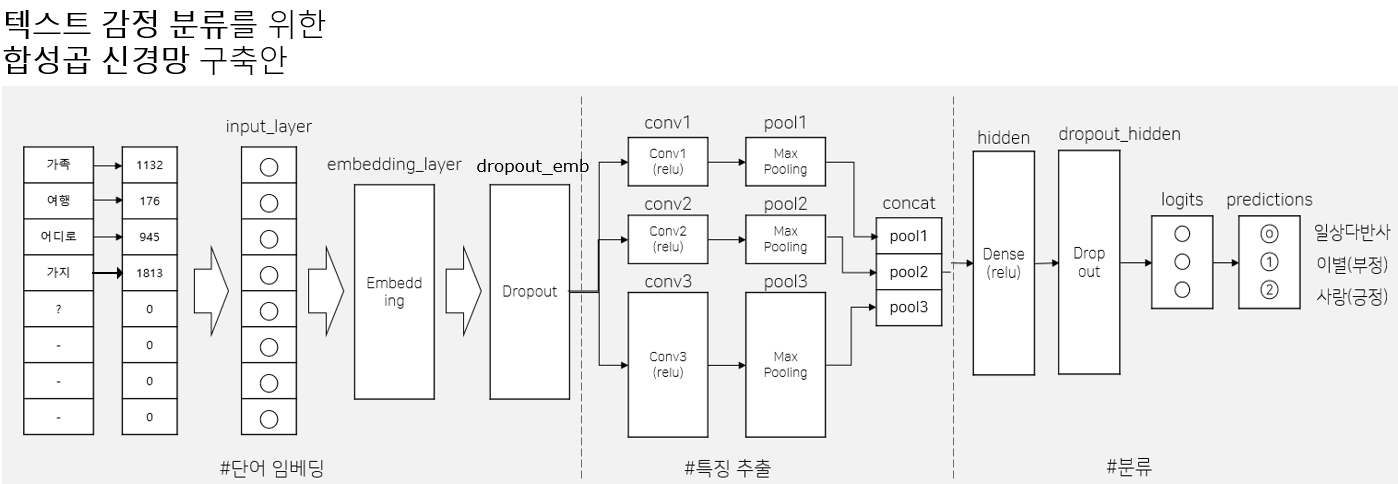

In [35]:
# 입력 계층 
input_layer = Input(shape = (15,))

# 임베딩 계층 
# input_dim - 단어의 개수 + 1
# output_dim - 임베딩 레이어를 통과하게 되었을 때 차원 수 
# input_length - 임베딩 레이어에게 전달되어지는 값의 길이(size)
embedding_layer = Embedding(input_dim = len(word_index) + 1, output_dim = 128, input_length = 15)(input_layer)

# 드랍아웃 계층 
# rate - 얼마만틈의 비율을 학습 과정에서 탈락시킬 것이냐. 
# 과적합 방지의 역할 / 너무 과하게 값을 잡으면 다수의 노드가 탈락하기에 성능의 측면에서 
# 부정적인 영향을 미치게 됩니다. 
dropout_emb = Dropout(rate=0.5)(embedding_layer)


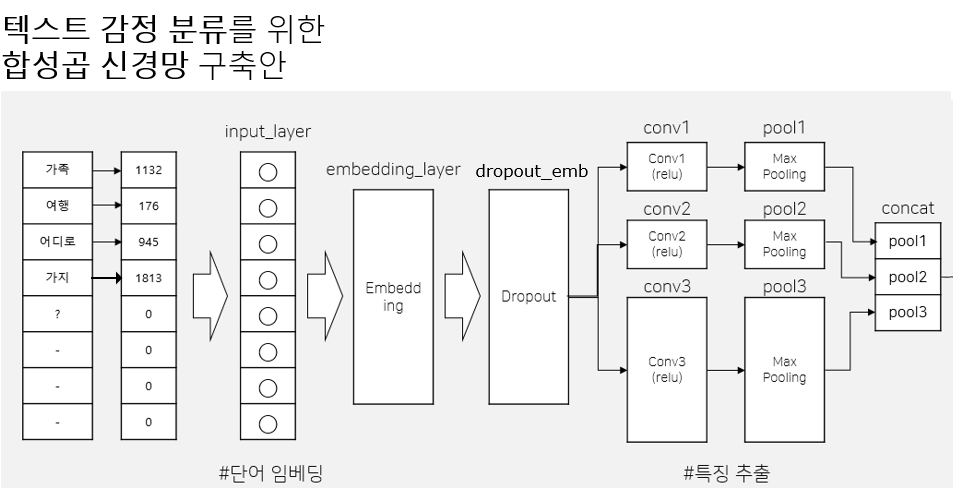

In [36]:
conv1 = Conv1D(filters=128, kernel_size=3, activation='relu')(dropout_emb)
pool1 = GlobalMaxPooling1D()(conv1)

conv2 = Conv1D(filters=128, kernel_size=4, activation='relu')(dropout_emb)
pool2 = GlobalMaxPooling1D()(conv2)

conv3 = Conv1D(filters=128, kernel_size=5, activation='relu')(dropout_emb)
pool3 = GlobalMaxPooling1D()(conv3)

concat = concatenate([pool1,pool2,pool3])

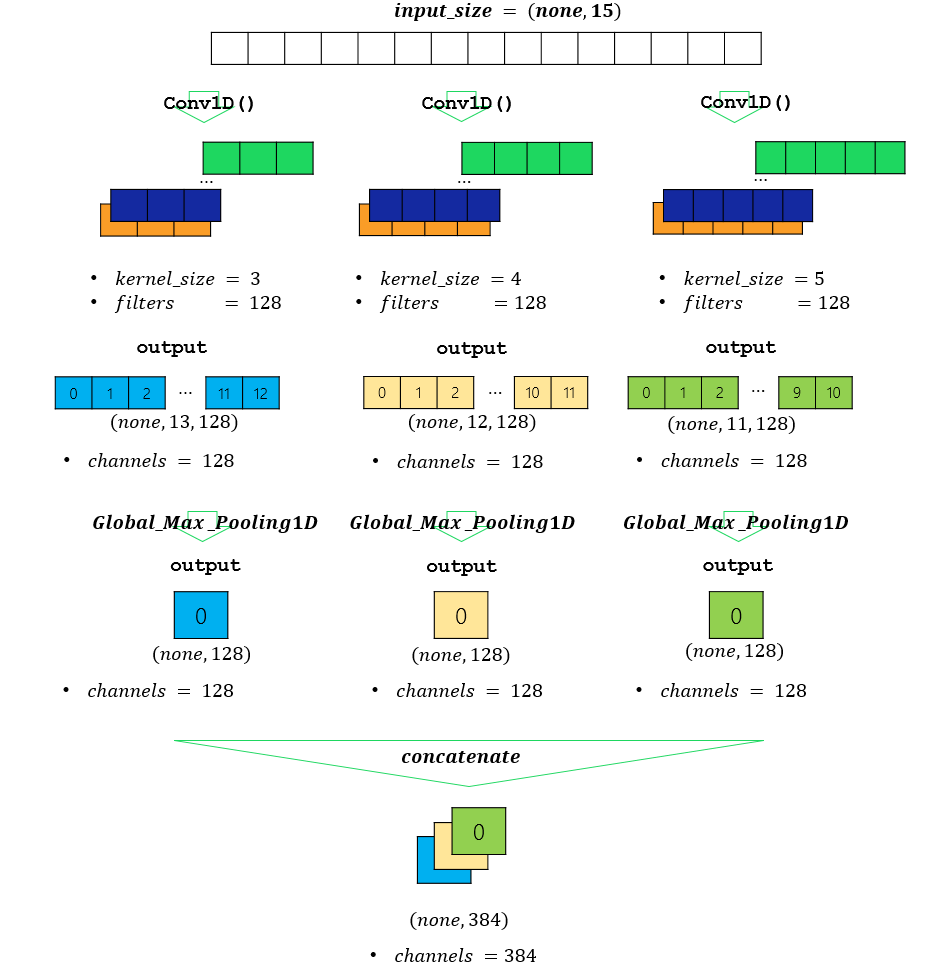

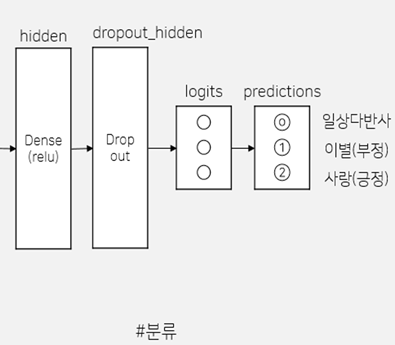

In [37]:
hidden = Dense(128, activation='relu')(concat)
dense_2 = Dense(64, activation='relu')(hidden)

dropout_hidden = Dropout(rate=0.5)(dense_2)

logits = Dense(3)(dropout_hidden)

predictions = Dense(3, activation="softmax")(logits)

In [38]:
model = Model(inputs = input_layer , outputs  = predictions)

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 128)      1715072     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 15, 128)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 13, 128)      49280       dropout[0][0]                    
______________________________________________________________________________________________

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y,    
                    batch_size = 16,
                    validation_split = 0.3, 
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)],
                    epochs=50)

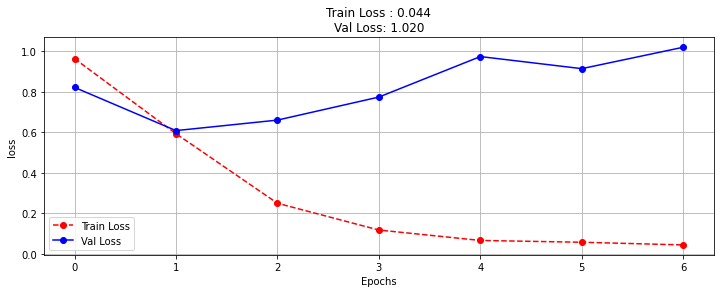

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(history.history['loss'], '--o', color = 'red', label = 'Train Loss')
plt.plot(history.history['val_loss'], '-o', color = 'blue', label = 'Val Loss')

plt.title('Train Loss : {:.3f}\nVal Loss: {:.3f}'.format(history.history['loss'][-1],history.history['val_loss'][-1]))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.show()

In [45]:
result = model.evaluate(test_x, test_y)
print(result)

111/111 [==============================] - 1s 6ms/step - loss: 1.0837 - accuracy: 0.7606
[1.083744764328003, 0.7606427669525146]


In [53]:
pick = np.random.choice(11823)

print("단어 시퀀스 : ", corpus_row[pick])
print("단어 인덱스 시퀀스 : ", padded_seqs[pick])
print("문장 분류(정답) : ", labels[pick])

picks = [np.random.choice(pick)]
predict = model.predict(padded_seqs[picks])
predict_class = np.argmax(predict)
print("감정 예측 점수 : ",np.round(predict * 100))
print("감정 예측 클래스 : ", predict_class)

단어 시퀀스 :  ['그저', '그런', '하루']
단어 인덱스 시퀀스 :  [1410  515  220    0    0    0    0    0    0    0    0    0    0    0
    0]
문장 분류(정답) :  0
감정 예측 점수 :  [[98.  1.  0.]]
감정 예측 클래스 :  0
